<a href="https://colab.research.google.com/github/JavadMokhtari/dapa-group/blob/main/Visualize_Feature_Maps_in_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

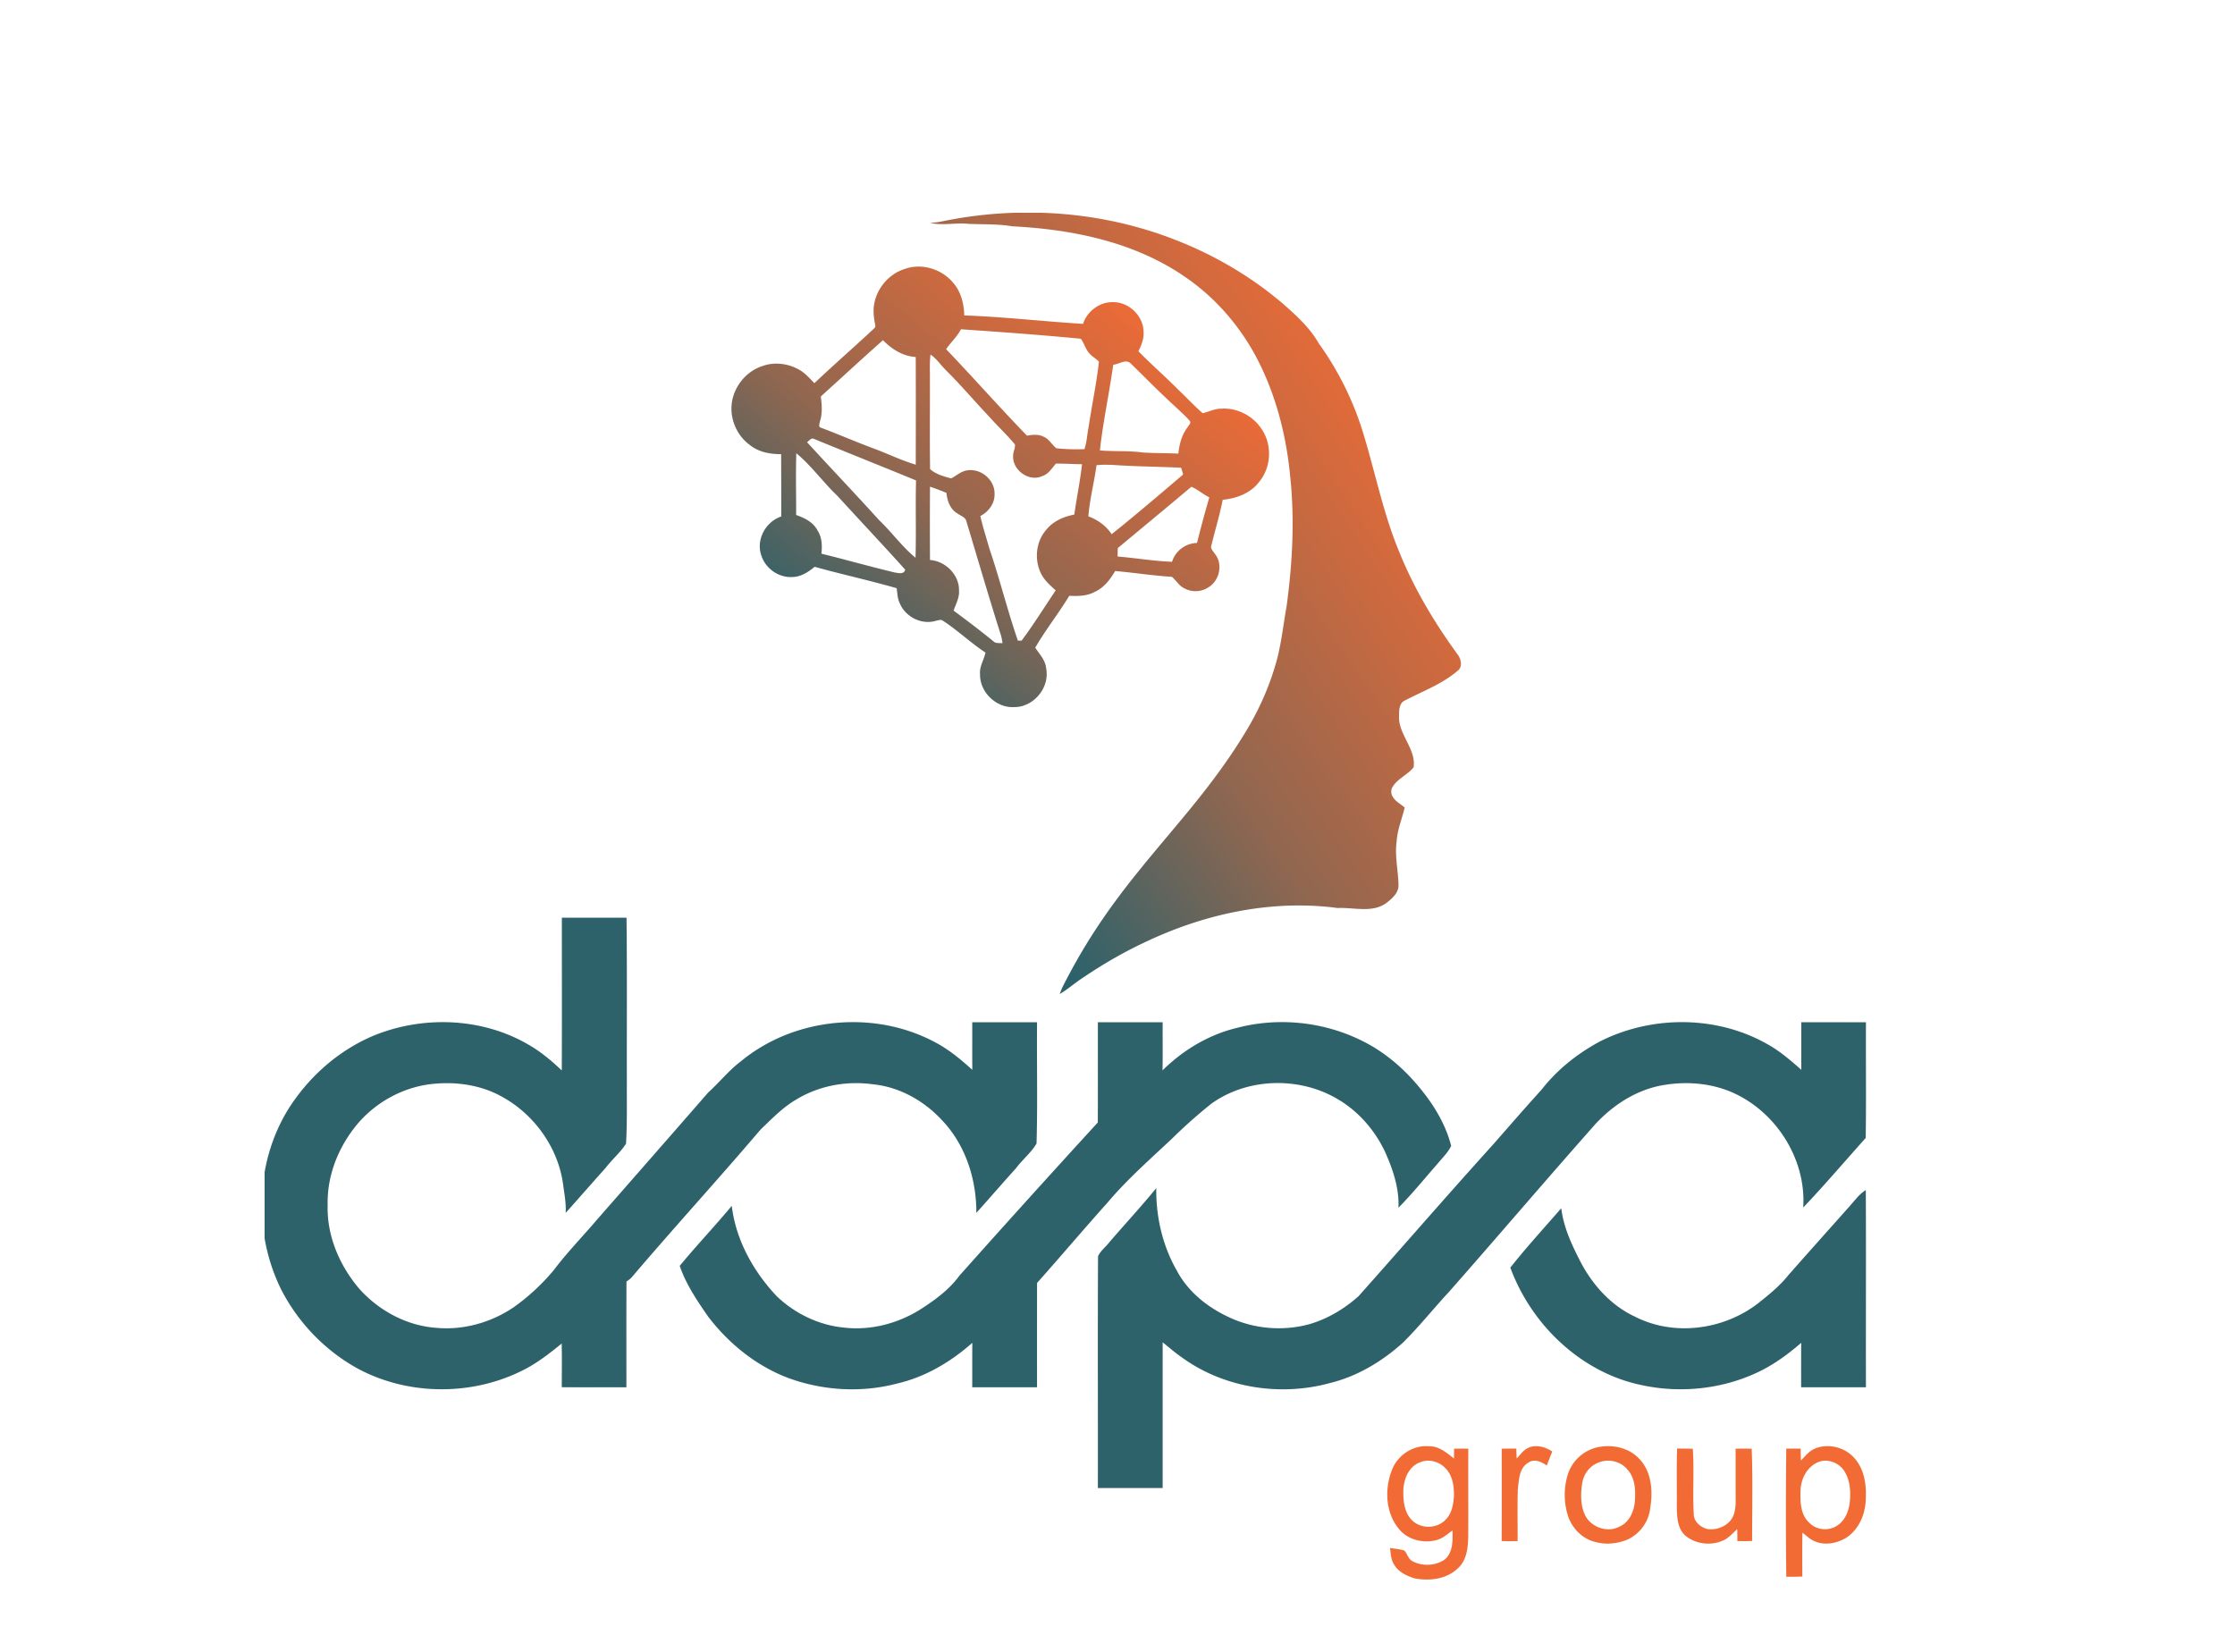
# <h1><center>Visualize Filters and Feature Maps in Convolutional Neural Networks</center></h1>

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

In [ ]:
# Load DenseNet model and show its properties
model = DenseNet121()
model.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_24 (ZeroPadding  (None, 230, 230, 3)  0          ['input_14[0][0]']               
 2D)                                                                                              
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_24[0][0]']      
                                )                                                       

## Visualize Filters

In [ ]:
# Display convolutional filters and shape of their output
print('\nLayer Name', '\t\t Filter Shape', '\t\t Output Shape')
cnn_layers = []
for layer in model.layers:
    if '_2_conv' in layer.name:
        cnn_layers.append(layer)
        filters = layer.get_weights()[0]
        print(layer.name, '\t', filters.shape, '\t', layer.output_shape)


Layer Name 		 Filter Shape 		 Output Shape
conv2_block1_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block2_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block3_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block4_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block5_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv2_block6_2_conv 	 (3, 3, 128, 32) 	 (None, 56, 56, 32)
conv3_block1_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block2_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block3_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block4_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block5_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block6_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block7_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block8_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block9_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block10_2_conv 	 (3, 3, 128, 32) 	 (None, 28, 28, 32)
conv3_block

In [ ]:
# Get the filters of first convolutional layer
filters = cnn_layers[0].get_weights()[0]

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

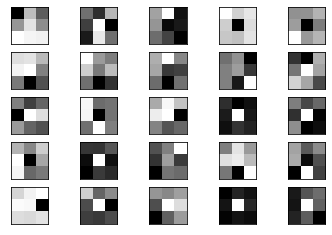

In [ ]:
# plot first few filters
n_filters, ix = 5, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(5):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 5, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

## Visualize Feature Maps

In [ ]:
# Download an image
!wget https://machinelearningmastery.com/wp-content/uploads/2019/02/bird.jpg

--2023-02-23 20:08:51--  https://machinelearningmastery.com/wp-content/uploads/2019/02/bird.jpg
Resolving machinelearningmastery.com (machinelearningmastery.com)... 104.26.0.148, 172.67.72.46, 104.26.1.148, ...
Connecting to machinelearningmastery.com (machinelearningmastery.com)|104.26.0.148|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23765 (23K) [image/jpeg]
Saving to: ‘bird.jpg.5’

bird.jpg.5          100%[===================>]  23.21K  --.-KB/s    in 0.001s  

2023-02-23 20:08:51 (23.5 MB/s) - ‘bird.jpg.5’ saved [23765/23765]



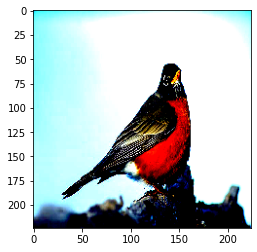

In [ ]:
# Load and preprocess the input image
img = load_img('bird.jpg', target_size=(224, 224))
img_array = img_to_array(img)
img_tensor = preprocess_input(img_array)
plt.imshow(img_tensor)

In [ ]:
# Define a fuction to extract feature maps from an input image
def extract_features(model, layer_name: str, img: tf.Tensor):
    feature_extractor = keras.Model(inputs=model.input,
                                    outputs=model.get_layer(layer_name).output)
    features = feature_extractor(tf.expand_dims(img_tensor, axis=0))
    return features

In [ ]:
# Define a function to visualize feature maps
def visualize_feature_map(features):
    fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(16, 8))
    for i, ax in enumerate(axes.flat):
        ax.imshow(features[0, :, :, i], cmap='gray')
        ax.axis('off')
    plt.show()

In [ ]:
# Show all layers with format conv$_block$_concat and their output shape
cnn_layers = []
for layer in model.layers:
    if '_concat' in layer.name:
        cnn_layers.append(layer)
        print(layer.name, '\t', layer.output_shape)

conv2_block1_concat 	 (None, 56, 56, 96)
conv2_block2_concat 	 (None, 56, 56, 128)
conv2_block3_concat 	 (None, 56, 56, 160)
conv2_block4_concat 	 (None, 56, 56, 192)
conv2_block5_concat 	 (None, 56, 56, 224)
conv2_block6_concat 	 (None, 56, 56, 256)
conv3_block1_concat 	 (None, 28, 28, 160)
conv3_block2_concat 	 (None, 28, 28, 192)
conv3_block3_concat 	 (None, 28, 28, 224)
conv3_block4_concat 	 (None, 28, 28, 256)
conv3_block5_concat 	 (None, 28, 28, 288)
conv3_block6_concat 	 (None, 28, 28, 320)
conv3_block7_concat 	 (None, 28, 28, 352)
conv3_block8_concat 	 (None, 28, 28, 384)
conv3_block9_concat 	 (None, 28, 28, 416)
conv3_block10_concat 	 (None, 28, 28, 448)
conv3_block11_concat 	 (None, 28, 28, 480)
conv3_block12_concat 	 (None, 28, 28, 512)
conv4_block1_concat 	 (None, 14, 14, 288)
conv4_block2_concat 	 (None, 14, 14, 320)
conv4_block3_concat 	 (None, 14, 14, 352)
conv4_block4_concat 	 (None, 14, 14, 384)
conv4_block5_concat 	 (None, 14, 14, 416)
conv4_block6_concat 	 (None, 14,

In this study, we utilized the ```DenseNet121``` convolutional neural network to visualize the feature map. This model consists of blocks of convolutional layers, where each layer's input is connected to the output of all previous layers. The DenseNet architecture was introduced in 2017 and outperforms the ```ResNet``` model with fewer parameters. Both networks were designed to address the problem of vanishing gradient by incorporating residual connections.

We imported the pre-trained ```DenseNet121``` model from the ```TensorFlow``` library and displayed the feature map for a bird input image after the concatenation layer, which is located after each block. The images showed that the initial layers of the model effectively extracted partial features and low-level patterns. However, as we moved towards the final layers of the model, it extracted higher-level features and gained a more comprehensive understanding of the input image. This observation is in line with the principles of deep learning and the hierarchical nature of convolutional neural networks.

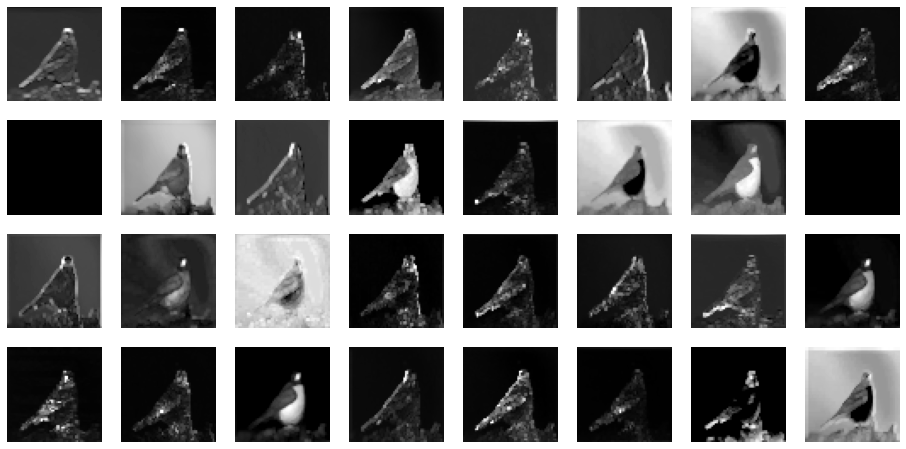

In [ ]:
features2 = extract_features(model, 'conv2_block1_concat', img_tensor)
visualize_feature_map(features2)

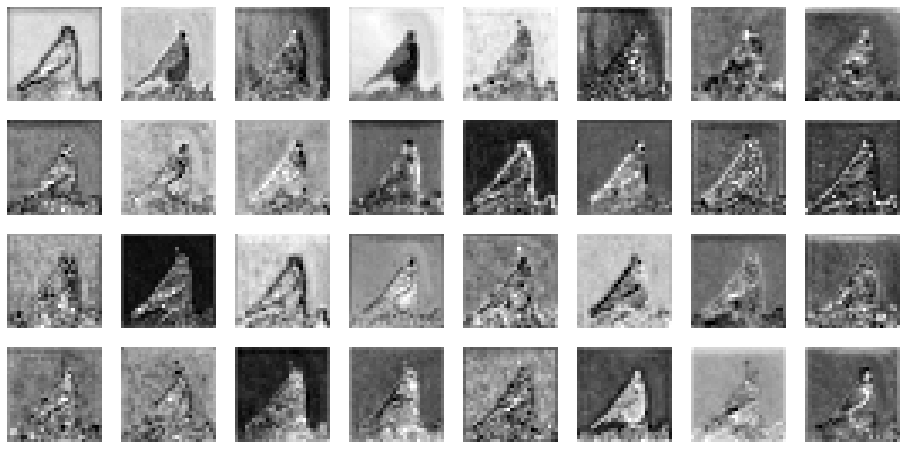

In [ ]:
features3 = extract_features(model, 'conv3_block12_concat', img_tensor)
visualize_feature_map(features3)

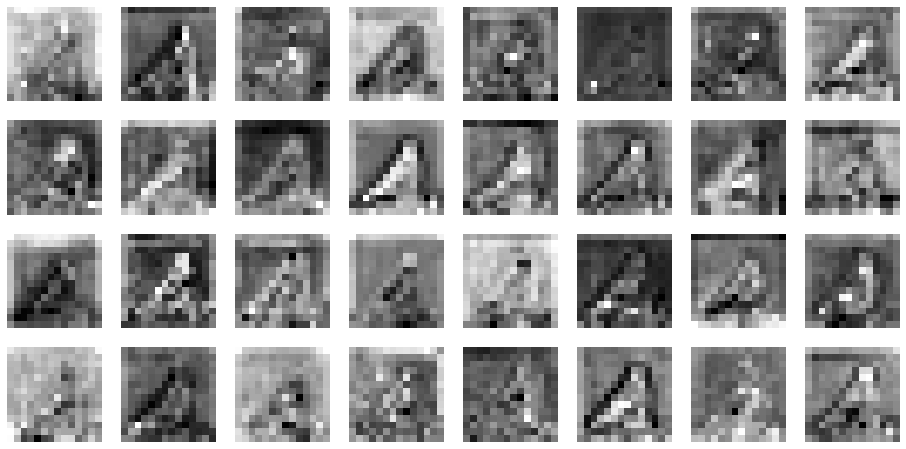

In [ ]:
features4 = extract_features(model, 'conv4_block24_concat', img_tensor)
visualize_feature_map(features4)

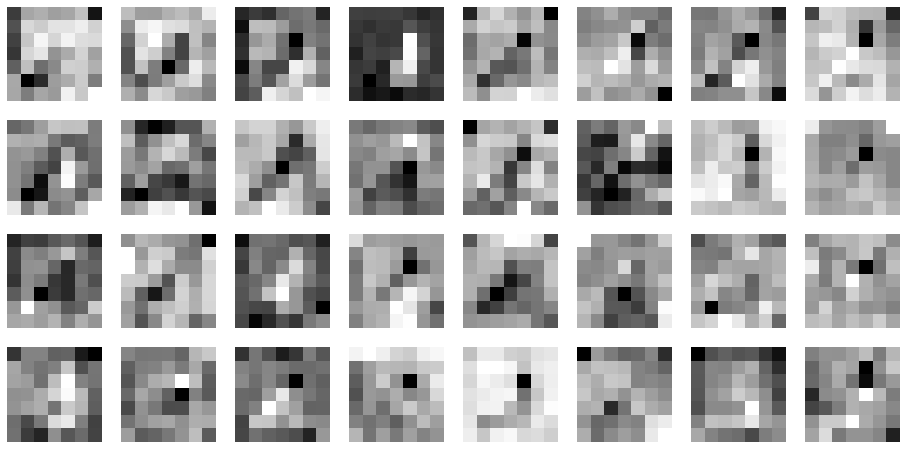

In [ ]:
features5 = extract_features(model, 'conv5_block16_concat', img_tensor)
visualize_feature_map(features5)